In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## TRAINING DATA

In [118]:
titanic = pd.read_csv('train.csv')

In [119]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
titanic.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


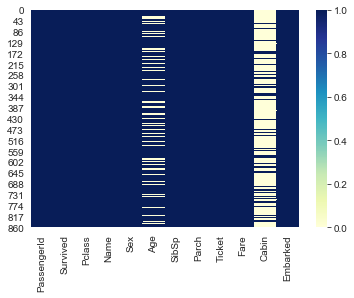

In [123]:
sns.heatmap(titanic.notnull(), cmap = 'YlGnBu')

In [124]:
titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

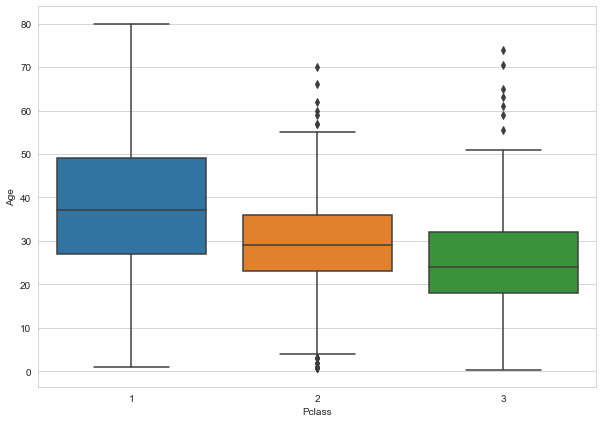

In [125]:
plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
sns.boxplot(y = 'Age', x = 'Pclass', data = titanic)

**This box plot shows that First class seats were occupied by the elderly(around 40 years), Second class by the middle aged people(around 30 years) and the Third class by youngsters.**

In [126]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [127]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age, axis = 1)

In [128]:
titanic.drop('Cabin', axis = 1, inplace = True)

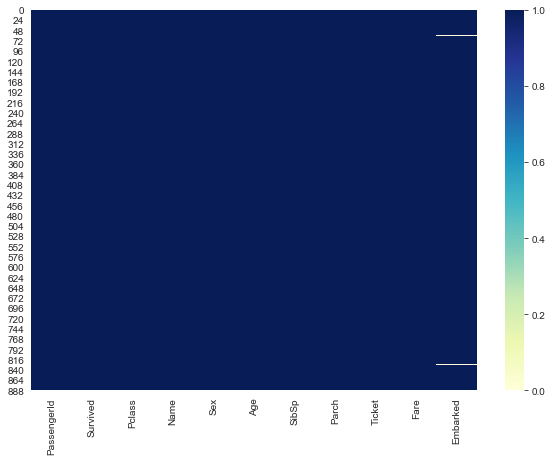

In [129]:
plt.figure(figsize = (10,7))
sns.heatmap(titanic.notnull(), cmap = 'YlGnBu')

In [130]:
titanic.dropna(inplace = True)

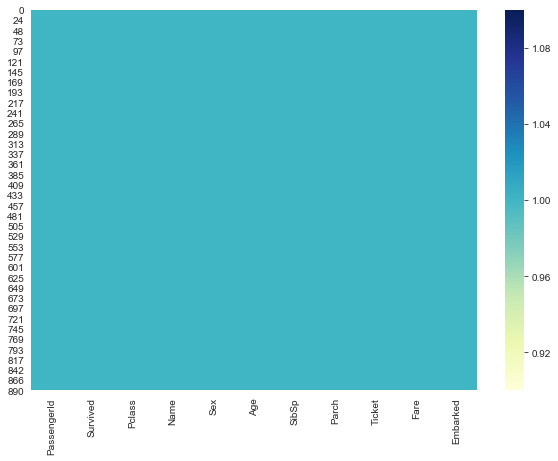

In [131]:
plt.figure(figsize = (10,7))
sns.heatmap(titanic.notnull(), cmap = 'YlGnBu')

In [132]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [133]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
embark = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [134]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [135]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [136]:
titanic.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace  = True)

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24.0,1,0,7.2500
1,2,1,1,37.0,1,0,71.2833
2,3,1,3,24.0,0,0,7.9250
3,4,1,1,37.0,1,0,53.1000
4,5,0,3,24.0,0,0,8.0500


In [137]:
titanic = pd.concat([titanic, sex, embark], axis = 1)

In [138]:
x_train = titanic.drop('Survived', axis = 1)
y_train = titanic['Survived']

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [140]:
lm = LogisticRegression()

In [141]:
lm.fit(x_train, y_train)

C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## TESTING DATA

In [171]:
test_t = pd.read_csv('test.csv')

In [172]:
test_t.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [173]:
test_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


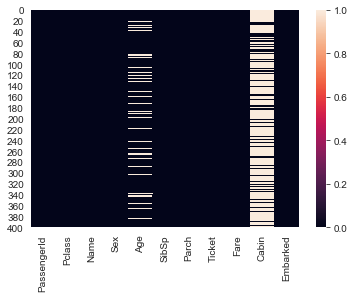

In [174]:
sns.heatmap(test_t.isnull())

In [175]:
test_t['Age'] = test_t[['Age', 'Pclass']].apply(age, axis = 1)

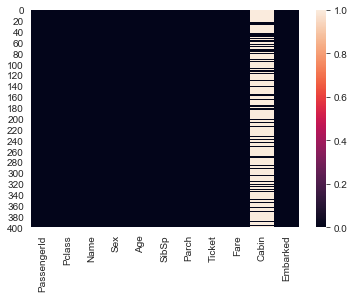

In [176]:
sns.heatmap(test_t.isnull())

In [177]:
test_t.drop('Cabin', axis = 1, inplace = True)

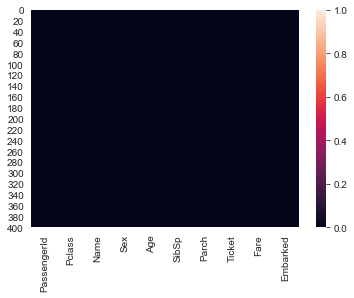

In [178]:
sns.heatmap(test_t.isnull())

In [179]:
test_t[test_t['Fare'].isnull()]['PassengerId']

152    1044
Name: PassengerId, dtype: int64

In [191]:
x = 1044
y = 152

In [181]:
test_t.dropna(inplace = True)

In [182]:
sex = pd.get_dummies(test_t['Sex'], drop_first = True)
embark = pd.get_dummies(test_t['Embarked'], drop_first = True)

In [183]:
test_t = pd.concat([test_t, sex, embark], axis = 1)

In [184]:
test_t

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,0,1
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1,0,1


In [185]:
test_t.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [186]:
test_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
Pclass    417 non-null int64
Age       417 non-null float64
SibSp     417 non-null int64
Parch     417 non-null int64
Fare      417 non-null float64
male      417 non-null uint8
Q         417 non-null uint8
S         417 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [187]:
predictions = lm.predict(test_t)

In [188]:
y_test = pd.read_csv('gender_submission.csv')

In [189]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [190]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [192]:
y_test.drop(y, axis = 0, inplace = True)`

In [195]:
y_test.drop('PassengerId', axis = 1, inplace = True)

In [196]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 1 columns):
Survived    417 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB


In [197]:
metrics.confusion_matrix(y_test, predictions)

array([[256,   9],
       [  8, 144]], dtype=int64)